In [1]:
using Pkg

projectdir_static = dirname(Base.active_project())

projectdirx(args...) = joinpath(projectdir_static, args...)

# Generate functions to access the path of default subdirectories.
for dir_type ∈ ("data", "src", "plots", "scripts", "papers")
    function_name = Symbol(dir_type * "dirx")
    @eval begin
        $function_name(args...) = projectdirx($dir_type, args...)
    end
end

using DrWatson

@quickactivate "TissueRigidity"
 
projectname()

"TissueRigidity"

In [2]:
using DifferentialEquations
using StatsBase
using CairoMakie
using XLSX
using DataFrames
using Optimization, OptimizationPolyalgorithms, SciMLSensitivity,OptimizationOptimJL,OptimizationBBO,OptimizationNOMAD

┌ Warning: Error requiring `Enzyme` from `LinearSolve`
│   exception = (LoadError("/Users/boothh/.julia/packages/LinearSolve/qCLK7/ext/LinearSolveEnzymeExt.jl", 1, ArgumentError("Package LinearSolve does not have Enzyme in its dependencies:\n- You may have a partially installed environment. Try `Pkg.instantiate()`\n  to ensure all packages in the environment are installed.\n- Or, if you have LinearSolve checked out for development and have\n  added Enzyme as a dependency but haven't updated your primary\n  environment's manifest file, try `Pkg.resolve()`.\n- Otherwise you may need to report an issue with LinearSolve")), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00000001205cf7dc, Ptr{Nothing} @0x00000001205cfa26, Ptr{Nothing} @0x000000010d28e6bd, Ptr{Nothing} @0x000000010d2c5a6d, Ptr{Nothing} @0x000000010d2c484f, Ptr{Nothing} @0x000000010d2c5039, Ptr{Nothing} @0x000000010d2c4cad, Ptr{Nothing} @0x000000010d2c5ef5, Ptr{Nothing} @0x0000000129b4dc41, Ptr{Nothing} @0x000000010d

In [100]:
include(srcdirx("FittingFunctions.jl"))

include(srcdirx("Plotting&Utility.jl"))

include(srcdirx("NodalLefty_NewTerm.jl"))

exp_name = "NodalLefty_DiffusionDominated_Zena_Set1"

include(srcdirx("ExperimentSetups/" * exp_name * ".jl"))

include(scriptsdirx("LoadData.jl"));

In [5]:
pv_orig = [DN0,DL0,kN0,kL0,kE,kNL,σN0,σL0,Na,NL,NE,LN,s0]

p_orig,p_cp_orig,p_lm_orig = get_params(pv_orig)

tspan = (0,Inf)

u0 = ones(Nc,4)

u0[:,1] .= 1e-10
u0[:,2] .= 1e-10
u0[:,3] .= 0.
u0[:,4] .= α0

prob = ODEProblem(nodal_lefty_spatial_diff!,u0,tspan,p_orig)

lb = copy(pv_orig)
ub = copy(pv_orig)

lb[1:2] = 0.9 .* lb[1:2]
ub[1:2] = 1.1 .* ub[1:2]

lb[3:end] = (1 - γ) .* lb[3:end]
ub[3:end] = (1 + γ) .* ub[3:end];

In [101]:
# test_set = [pv_orig,[DN0,DL0,0.2*10*kN0,kL0,kE,kNL,0.2*15*σN0,σL0,0.2*Na,NL,NE,LN,s0],[DN0,DL0,5*10*kN0,kL0,kE,kNL,5*15*σN0,σL0,5*Na,NL,NE,LN,s0]]

# test_set = [pv_orig,[DN0,DL0,5*10*kN0,kL0,kE,kNL,5*15*σN0,σL0,5*Na,NL,NE,LN,s0],[DN0,DL0,2*5*10*kN0,kL0,kE,kNL,2*5*15*σN0,σL0,5*Na,NL,NE,LN,s0]]

test_set = [[DN0,DL0,kN0,kL0,kE,kNL,0*σN0,σL0,Na,NL,NE,LN,s0],pv_orig,[DN0,DL0,kN0,kL0,0.8*kE,kNL,1.5*σN0,σL0,Na,NL,NE,LN,s0]]

3-element Vector{Vector{Float64}}:
 [1.95, 15.0, 1.5194850483459551e-6, 7.465310302629284e-7, 0.00023081878031613502, 10.303407667201299, 0.0, 0.00046538852919702296, 31.6228, 200.0, 15.0, 19.150715022082355, 5.0]
 [1.95, 15.0, 1.5194850483459551e-6, 7.465310302629284e-7, 0.00023081878031613502, 10.303407667201299, 0.01, 0.00046538852919702296, 31.6228, 200.0, 15.0, 19.150715022082355, 5.0]
 [1.95, 15.0, 1.5194850483459551e-6, 7.465310302629284e-7, 0.00018465502425290802, 10.303407667201299, 0.015, 0.00046538852919702296, 31.6228, 200.0, 15.0, 19.150715022082355, 5.0]

┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17
┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17


┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17
┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17


┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17
┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17


┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17
┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17


┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17
┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17


┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17
┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17


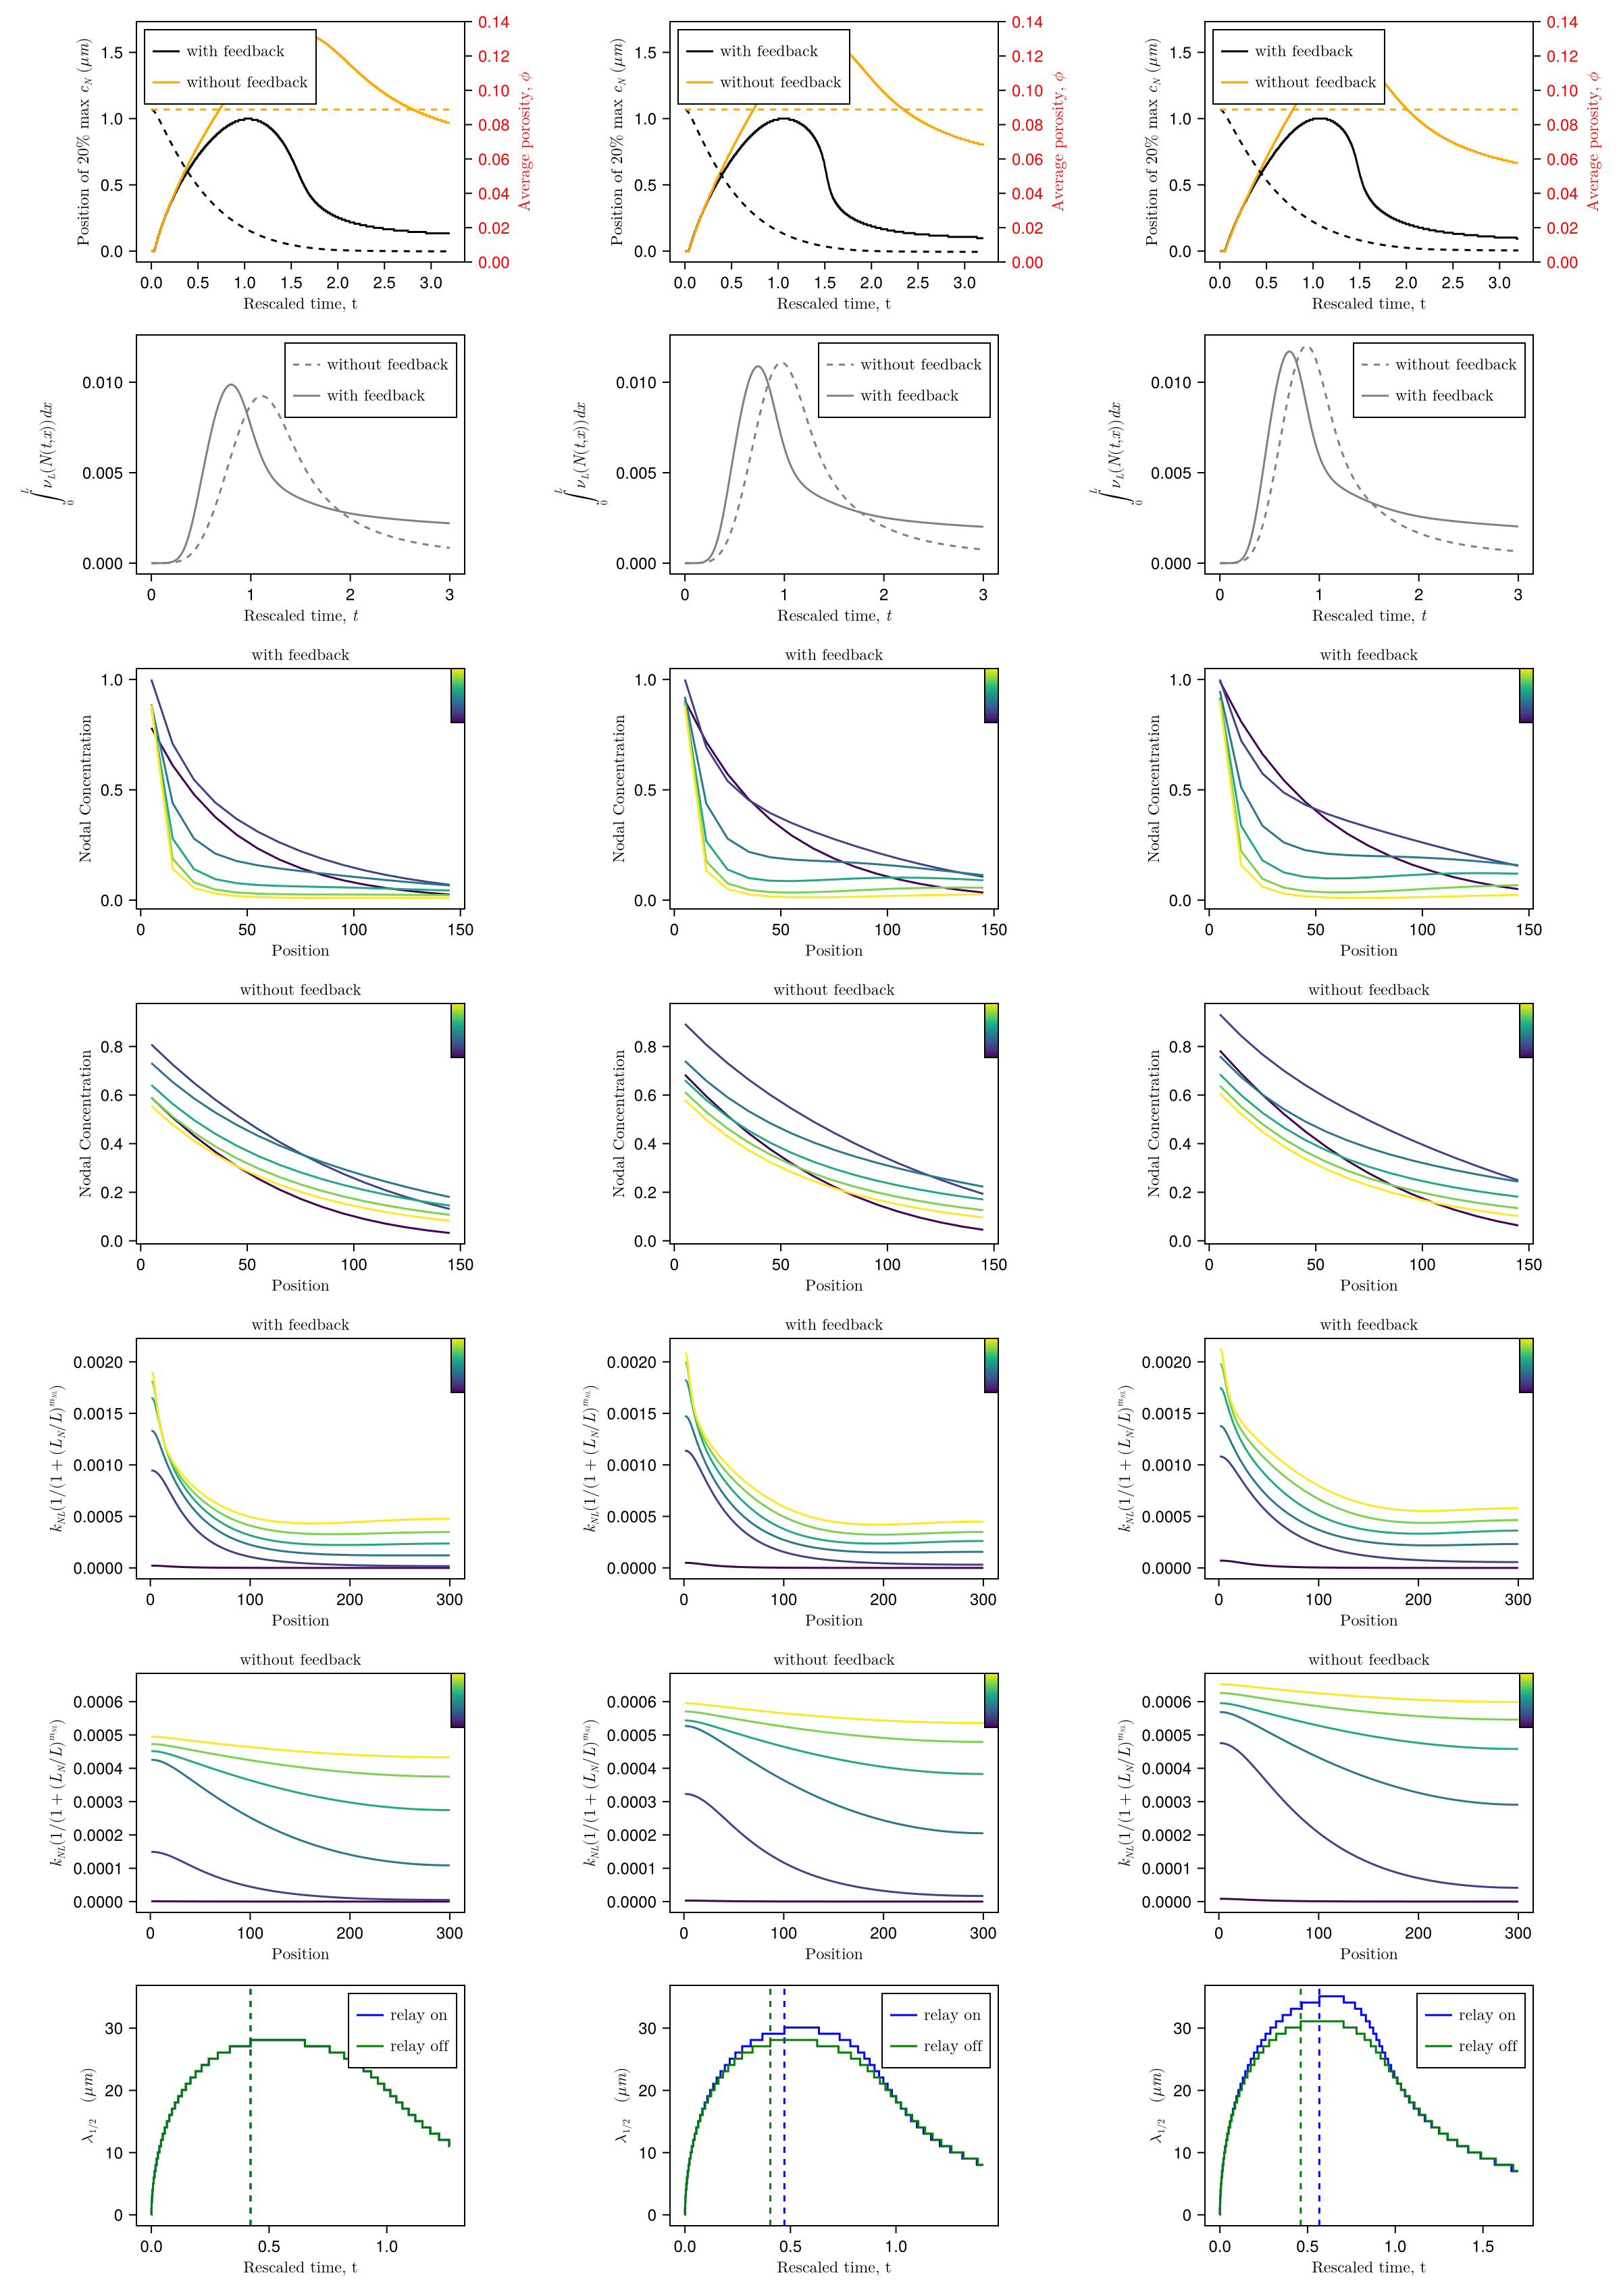

In [104]:
fig = Figure(size = (1200,1700), fontsize = 12.)

fig, data_dict = plot_summary_newtimes_compare_binned_reduced!(fig,test_set,prob,10)

fig

In [105]:
save(plotsdir(exp_name * "/FinalFigures_DT_v1/Relay-Diffusion_ZenaSet1_NewTerm_Binned_newtimes.pdf"),fig)

# replace with save(plotsdir(exp_name * "_FILENAME.pdf"),fig) # if you want to save the figure on you rmachine

CairoMakie.Screen{PDF}


In [106]:
smad_df1 = DataFrames.DataFrame(data_dict[1]["SMAD_data"])
smad_df2 = DataFrames.DataFrame(data_dict[2]["SMAD_data"])
smad_df3 = DataFrames.DataFrame(data_dict[3]["SMAD_data"]);

lambda1 = DataFrames.DataFrame(data_dict[1]["Lambda1/2"])
lambda2 = DataFrames.DataFrame(data_dict[2]["Lambda1/2"])
lambda3 = DataFrames.DataFrame(data_dict[3]["Lambda1/2"])

nodal1 = DataFrames.DataFrame(data_dict[1]["NodalProfiles"])
nodal2 = DataFrames.DataFrame(data_dict[2]["NodalProfiles"])
nodal3 = DataFrames.DataFrame(data_dict[3]["NodalProfiles"])

nodal1_wnt11 = DataFrames.DataFrame(data_dict[1]["NodalProfiles_wnt11"])
nodal2_wnt11 = DataFrames.DataFrame(data_dict[2]["NodalProfiles_wnt11"])
nodal3_wnt11 = DataFrames.DataFrame(data_dict[3]["NodalProfiles_wnt11"])

ldeg1 = DataFrames.DataFrame(data_dict[1]["LeftyDegradationN"])
ldeg2 = DataFrames.DataFrame(data_dict[2]["LeftyDegradationN"])
ldeg3 = DataFrames.DataFrame(data_dict[3]["LeftyDegradationN"])

ldeg1_wnt11 = DataFrames.DataFrame(data_dict[1]["LeftyDegradationN_wnt11"])
ldeg2_wnt11 = DataFrames.DataFrame(data_dict[2]["LeftyDegradationN_wnt11"])
ldeg3_wnt11 = DataFrames.DataFrame(data_dict[3]["LeftyDegradationN_wnt11"])

intl1 = DataFrames.DataFrame(data_dict[1]["IntLefty"])
intl2 = DataFrames.DataFrame(data_dict[2]["IntLefty"])
intl3 = DataFrames.DataFrame(data_dict[3]["IntLefty"]);

In [107]:
rename!(nodal1,["0.5t_wt","t_wt","1.5t_wt","2t_wt","2.5t_wt","3t_wt"])
rename!(nodal2,["0.5t_wt","t_wt","1.5t_wt","2t_wt","2.5t_wt","3t_wt"])
rename!(nodal3,["0.5t_wt","t_wt","1.5t_wt","2t_wt","2.5t_wt","3t_wt"])

rename!(nodal1_wnt11,["0.5t_wt","t_wt","1.5t_wt","2t_wt","2.5t_wt","3t_wt"])
rename!(nodal2_wnt11,["0.5t_wt","t_wt","1.5t_wt","2t_wt","2.5t_wt","3t_wt"])
rename!(nodal3_wnt11,["0.5t_wt","t_wt","1.5t_wt","2t_wt","2.5t_wt","3t_wt"])

rename!(ldeg1,["0.5t_wt","t_wt","1.5t_wt","2t_wt","2.5t_wt","3t_wt"])
rename!(ldeg2,["0.5t_wt","t_wt","1.5t_wt","2t_wt","2.5t_wt","3t_wt"])
rename!(ldeg3,["0.5t_wt","t_wt","1.5t_wt","2t_wt","2.5t_wt","3t_wt"]);

rename!(ldeg1_wnt11,["0.5t_wt","t_wt","1.5t_wt","2t_wt","2.5t_wt","3t_wt"])
rename!(ldeg2_wnt11,["0.5t_wt","t_wt","1.5t_wt","2t_wt","2.5t_wt","3t_wt"])
rename!(ldeg3_wnt11,["0.5t_wt","t_wt","1.5t_wt","2t_wt","2.5t_wt","3t_wt"]);

In [108]:
p_diff_case,_,_ = get_params([DN0,DL0,kN0,kL0,kE,kNL,0*σN0,σL0,Na,NL,NE,LN,s0])

p_relay_case,_,_ = get_params([DN0,DL0,kN0,kL0,0.8*kE,kNL,1.5*σN0,σL0,Na,NL,NE,LN,s0]);

In [109]:
parameter_df1 =  DataFrames.DataFrame()

for var in p_names
    parameter_df1[!,p_names_string[var]] = [p_diff_case[var]]
end

parameter_df2 =  DataFrames.DataFrame()

for var in p_names
    parameter_df2[!,p_names_string[var]] = [p_orig[var]]
end

parameter_df3 =  DataFrames.DataFrame()

for var in p_names
    parameter_df3[!,p_names_string[var]] = [p_relay_case[var]]
end

In [110]:
XLSX.writetable(plotsdir(exp_name *  "/FinalFigures_DT_v1/SuppFigureData" * ".xlsx"), "SMADFits_Diffusion"=>smad_df1,"SMADFits_Middle"=>smad_df2,"SMADFits_Relay"=>smad_df3,
"LambdaHalf_Diffusion"=>lambda1,"LambdaHalf_Middle"=>lambda2,"LambdaHalf_Relay"=>lambda3,
"NodalProfiles_Diffusion"=>nodal1,"NodalProfiles_Middle"=>nodal2,"NodalProfiles_Relay"=>nodal3,
"LeftyDegradationN_Diffusion"=>ldeg1,"LeftyDegradationN_Middle"=>ldeg2,"LeftyDegradationN_Relay"=>ldeg3,
"IntLefty_Diffusion"=>intl1,"IntLefty_Middle"=>intl2,"IntLefty_Relay"=>intl3,
"Param_Diffusion"=>parameter_df1,"Param_Middle"=>parameter_df2,"Param_Relay"=>parameter_df3);

In [112]:
test_set1 = [[DN0,DL0,kN0,kL0,kE,kNL,σN0,σL0,Na,150,NE,LN,s0],[DN0,DL0,kN0,kL0,kE,kNL,σN0,σL0,Na,100,NE,LN,s0],[DN0,DL0,kN0,kL0,kE,kNL,σN0,σL0,Na,50,NE,LN,s0]]

3-element Vector{Vector{Float64}}:
 [1.95, 15.0, 1.5194850483459551e-6, 7.465310302629284e-7, 0.00023081878031613502, 10.303407667201299, 0.01, 0.00046538852919702296, 31.6228, 150.0, 15.0, 19.150715022082355, 5.0]
 [1.95, 15.0, 1.5194850483459551e-6, 7.465310302629284e-7, 0.00023081878031613502, 10.303407667201299, 0.01, 0.00046538852919702296, 31.6228, 100.0, 15.0, 19.150715022082355, 5.0]
 [1.95, 15.0, 1.5194850483459551e-6, 7.465310302629284e-7, 0.00023081878031613502, 10.303407667201299, 0.01, 0.00046538852919702296, 31.6228, 50.0, 15.0, 19.150715022082355, 5.0]

┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17
┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17


┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17
┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17


┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17
┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17


┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17
┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17


┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17
┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17


┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17
┌ Warning: `.px_area` got renamed to `.viewport`, and means the area the scene maps to in device independent units, not pixels. Note, `size(scene) == widths(scene.viewport[])`
└ @ Makie /Users/boothh/.julia/packages/Makie/ux0Te/src/deprecated.jl:17


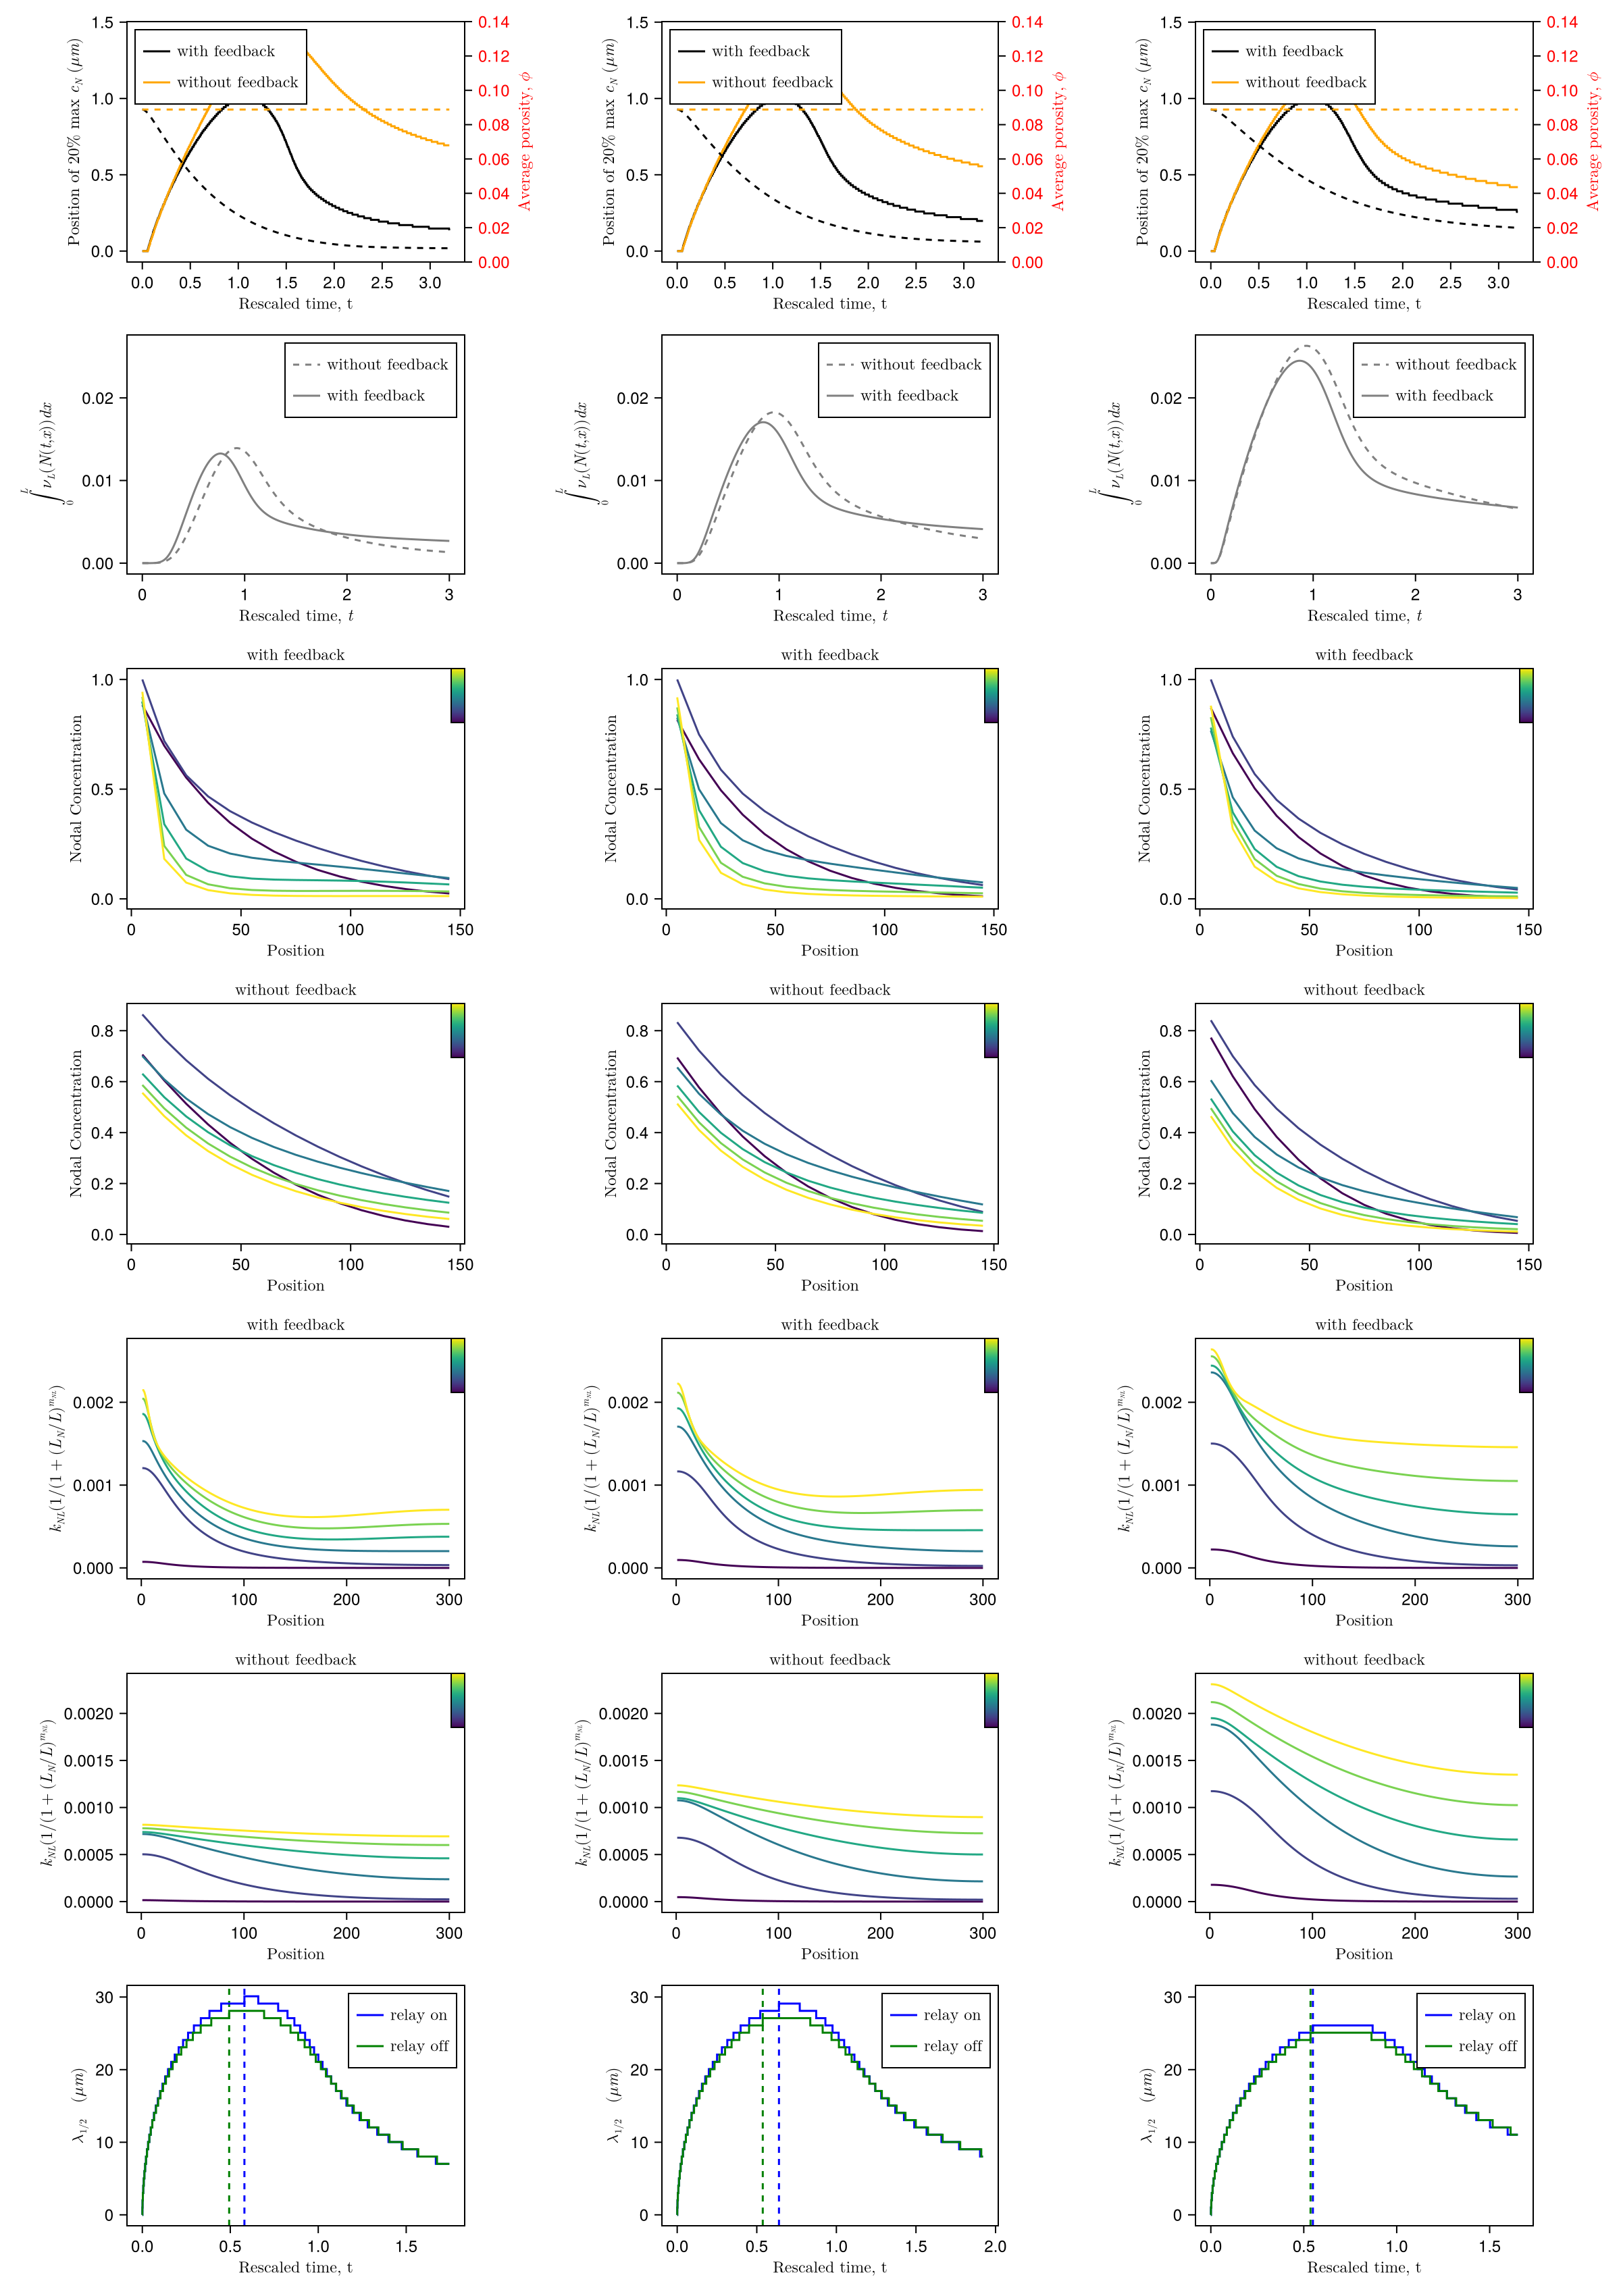

In [113]:
fig = Figure(size = (1200,1700), fontsize = 12.)

fig, data_dict = plot_summary_newtimes_compare_binned_reduced!(fig,test_set1,prob,10)

fig

In [114]:
save(plotsdir(exp_name * "/FinalFigures_DT_v1/NL-NE_Comparison.pdf"),fig)

# replace with save(plotsdir(exp_name * "_FILENAME.pdf"),fig) # if you want to save the figure on you rmachine

CairoMakie.Screen{PDF}
